In [1]:
import numpy as np

# 1 Preparation

## What is the purpose of an activation function in NN in general?
The activation function decides what output the neuron should give in relation to its input values and weights.

## What’s the advantage of e.g. sigmoid over the step function (threshold function)?
The sigmoid function allows for a smoother activation rather than an on-off activation as seen in the step function. With this we can express uncertainty in our classifications.


## How does sigmoid look like (the formula as well as the graph)?

Formula:
$\sigma(x) = \frac{1}{1+e^{-x}}$

with e being Euler's number. 

Graph

![Graph of the Simoid function](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Sigmoid-function-2.svg/2000px-Sigmoid-function-2.svg.png)

Source: Wikipedia

## What is the derivative of sigmoid?

$\sigma(x)' = \sigma(x)(1 - \sigma(x))$

## Implementation

In [2]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid function
def sigmoidprime(x):
    return sigmoid(x)*(1-sigmoid(x))

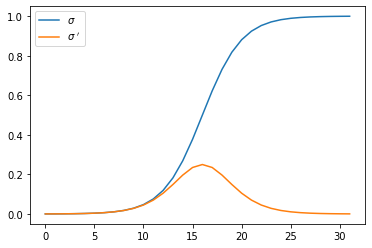

In [3]:
# Quick visualization

import matplotlib.pyplot as plt

values = np.arange(-8,8, 0.5)
plt.plot(sigmoid(values))
plt.plot(sigmoidprime(values))
plt.legend(["$\sigma$", "$\sigma \ '$"])
plt.show()

# 3 Perceptron

In [4]:
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        self.alpha = 1
        
    def forward_step(self, input_data):
        # Perform a perceptron forward step.
        weighted_sum =  self.weights @ input_data + self.bias 
        return sigmoid(weighted_sum)
        
    def training_step(self, input_data, label):
        # Perform a whole training step (including the forward step).
        # 1. Forward step.
        prediction = self.forward_step(input_data)
        # 2. Calculate the weight updates.
        delta_weights = self.alpha * (label - prediction) * input_data
        # 3. Calculate the bias update. We consider 1 as the "input" to the bias, so that we can treat it just like the other weights.
        delta_bias = self.alpha * (label - prediction) * 1
        # 4. Update weights and bias.
        self.weights += delta_weights
        self.bias += delta_bias

In [5]:
# Input data
x = np.array([(1, 1), (1, 0), (0, 1), (0, 0)])

# Labels
t_and = np.array([1,0,0,0])
t_or = np.array([1,1,1,0])
t_nand = np.array([0,1,1,1])
t_nor = np.array([0,0,0,1])
t_xor = np.array([0,1,1,0])

# Very simple example of a neural network with 2 inputs and 1 hidden layer
class MLP:
    def __init__(self, inputs, neurons_in_layer):
        self.perceptrons = [Perceptron(inputs) for _ in range(neurons_in_layer)]
        
    def forward_step(self, input_data):
        return np.array([perceptron.forward_step(input_data) for perceptron in self.perceptrons])
            
    def backprop_step(self, input_data, label):
        for perceptron in self.perceptrons:
            perceptron.training_step(input_data, label)
    

# Now let's train the perceptron.
t = t_and

mlp = MLP(2, 4)
output_layer = Perceptron(4)

# Initialize lists to store steps and performance.
steps = []
accuracies = []
losses = []

for i in range(1000):
    steps.append(i)
    # Draw random sample with corresponding label
    index = np.random.randint(len(x))
    sample = x[index]
    label = t[index]

    # Calculate Output
    hidden_layer_output = mlp.forward_step(sample)
    output = output_layer.forward_step(hidden_layer_output)
    
    # Calculate square error
    loss = (label - output) ** 2
    losses.append(loss)
    
    accuracy = 1 if (label - output) <= 0.5 else 0
    accuracies.append(accuracy)
    
    # Perform backpropagation
    output_layer.training_step(hidden_layer_output, label)
    mlp.backprop_step(sample, label)

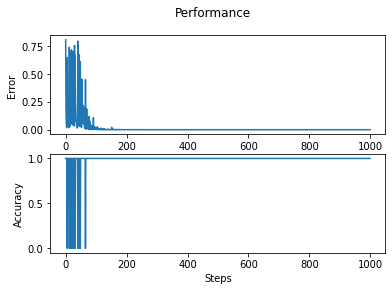

In [6]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2)
fig.suptitle('Performance')
axs[0].plot(steps, losses)
axs[0].set(xlabel='Steps', ylabel='Error')

axs[1].plot(steps, accuracies)
axs[1].set(xlabel='Steps', ylabel='Accuracy')

plt.show()